In [16]:
#Import the dependencies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from textblob import TextBlob 
import os

In [2]:
#Load dataset
df = pd.read_csv('F:/Week1_Challenge/Data/raw_analyst_ratings.csv')
#df=pd.read_csv('F:/solar-challenge-week1/data/togo_raw.csv')

In [3]:
# performing EDA on the given raw Data set
# Data understanding 
print("dataset info")
print("Dataset shape:", df.shape)
print("Dataset columns:", df.columns)
print("An overview of the dataset: the first 5 rows") 
print(df.head())
# overview of last 5 raws
print("****************************")
print("An overview of the dataset: the last 5 rows")
print(df.tail())
print("===========================")
print("An overview of the dataset: a random sample of 5 rows")
print(df.sample())



dataset info
Dataset shape: (1407328, 6)
Dataset columns: Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')
An overview of the dataset: the first 5 rows
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.co

In [4]:
#1.Check for missing values
print("****************************")
print("Check for missing values: ")
print(df.isna().sum())
print(len(df))


****************************
Check for missing values: 
Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64
1407328


In [ ]:
# 2. Outlier Detection & Basic Cleaning
print("****************************")
print("Outlier Detection & Basic Cleaning: ")

In [17]:
def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity
#applying the sentiment analysis function to our headline 
df['Sentiment']=df['headline'].apply(calculate_sentiment)


In [18]:
df.head()

,Unnamed: 0,headline,url,publisher,date,stock,Sentiment
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,0.0
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,0.0
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,0.0
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,0.0
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,0.0


Descriptive statistics for 'headline' column:
count                     1407328
unique                     845770
top       Benzinga's Top Upgrades
freq                         5449
Name: headline, dtype: object

Missing values in 'headline' column: 
0

Number of unique headlines:
845770

Most frequent headlines:
headline
Benzinga's Top Upgrades                     5449
Benzinga's Top Downgrades                   5372
Benzinga's Top Initiations                  4241
Stocks That Hit 52-Week Lows On Thursday    3962
Morning Market Losers                       3440
Name: count, dtype: int64

Sentiment distribution:
count    1.407328e+06
mean     4.905657e-02
std      1.830652e-01
min     -1.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: Sentiment, dtype: float64


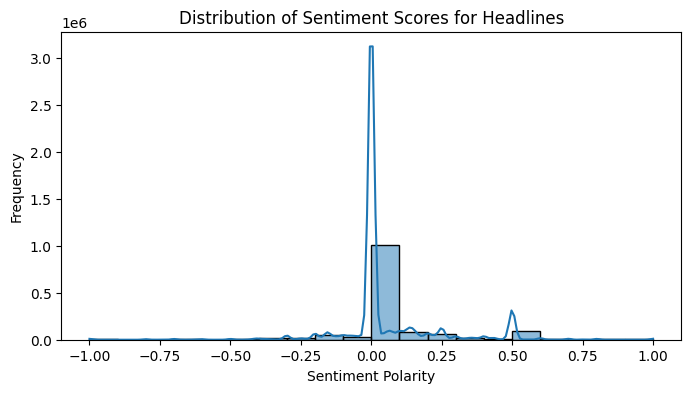

In [19]:
# Display descriptive statistics for the 'headline' column 
print("Descriptive statistics for 'headline' column:") 
print(df['headline'].describe())
# Check for missing values in the 'headline' column 
print("\nMissing values in 'headline' column: ") 
print(df['headline'].isnull().sum())
# Get the number of unique headlines 
print("\nNumber of unique headlines:") 
print(df['headline'].nunique())
#Display the most frequent headlines
print("\nMost frequent headlines:")
print (df['headline'].value_counts().head())
#  distribution of sentiment scores calculated earlier 
print("\nSentiment distribution:")
print(df['Sentiment'].describe())
#Plot the distribution of sentiment scores
plt.figure(figsize=(8, 4))
sns.histplot(df[ 'Sentiment'], bins=20, kde=True)
plt.title('Distribution of Sentiment Scores for Headlines')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

In [9]:
# Analysis the sentiment most positive and negative headlines 
print("\nMost positive headline:")
print(df.loc[df['Sentiment'].idxmax(), 'headline'])
# Display the most positive headline
print("\nMost negative headline:")
print(df.loc[df['Sentiment'].idxmin(), 'headline'])
# Count the number of positive, negative, and neutral headlines
print("\nSentiment counts:")
sentiment_counts = df['Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral')).value_counts()
print(sentiment_counts)
#plot the sentiment count distribution
plt.figure(figsize=(8, 4))
sns.countplot(x=df['Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral')))
plt.title('Sentiment Count Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()




Most positive headline:


NameError: name 'df' is not defined

In [ ]:
most_positive_headlines=df.nlargest(5,'Sentiment')
print("\nTop 5 most positive headlines:")
print(most_positive_headlines[['headline', 'Sentiment']])

NameError: name 'df' is not defined

In [21]:
# Save the processed DataFrame to a new CSV file
output_file = 'F:/Week1_Challenge/Data/processed_analyst_ratings.csv'
df.to_csv(output_file, index=False)